In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
print(df.head())
print(df.info())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [5]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [7]:
sse = []
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)
    labels = km.labels_
    sil = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil)

Text(0.5, 1.0, 'Elbow Method For Optimal k')

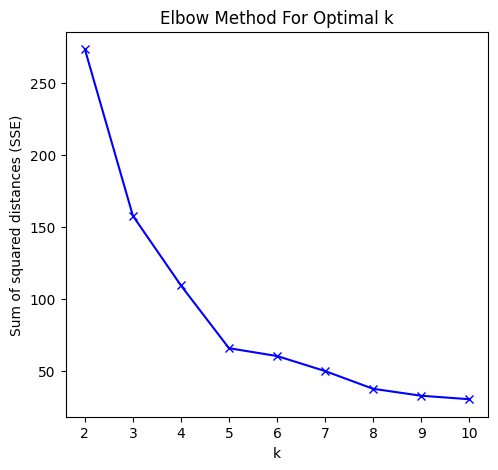

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method For Optimal k')

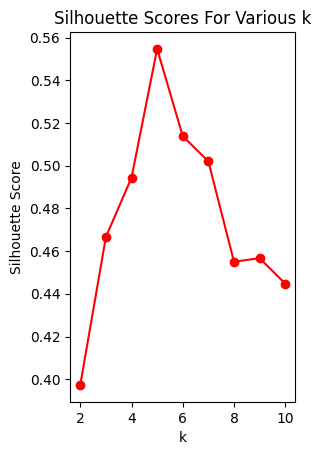

In [9]:
plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Various k')
plt.show()

In [10]:
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [11]:
df['Cluster'] = clusters

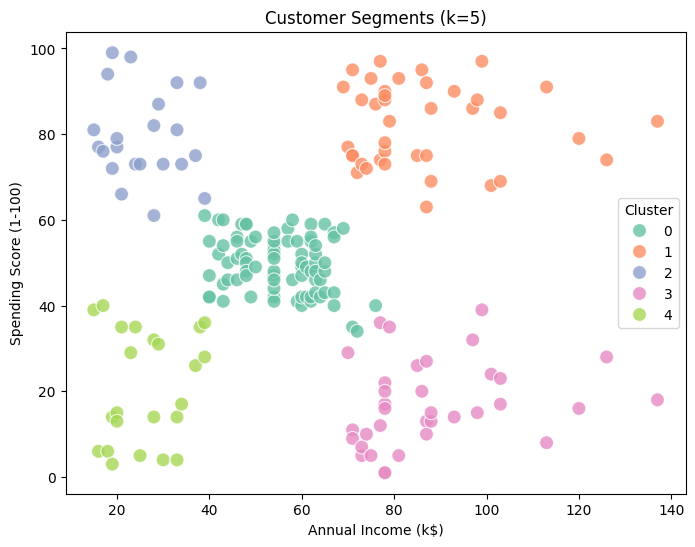

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x = df['Annual Income (k$)'],
    y = df['Spending Score (1-100)'],
    hue = df['Cluster'],
    palette = 'Set2',
    s = 100,
    alpha = 0.8
)
plt.title(f'Customer Segments (k={k_optimal})')
plt.show()

In [13]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features.columns)
print("Centroids (in original scale):")
print(centroid_df)

Centroids (in original scale):
   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043


In [14]:
for c in range(k_optimal):
    print(f"\nCluster {c}:")
    print(df[df['Cluster'] == c][features.columns].describe())


Cluster 0:
       Annual Income (k$)  Spending Score (1-100)
count           81.000000               81.000000
mean            55.296296               49.518519
std              8.988109                6.530909
min             39.000000               34.000000
25%             48.000000               44.000000
50%             54.000000               50.000000
75%             62.000000               55.000000
max             76.000000               61.000000

Cluster 1:
       Annual Income (k$)  Spending Score (1-100)
count           39.000000               39.000000
mean            86.538462               82.128205
std             16.312485                9.364489
min             69.000000               63.000000
25%             75.500000               74.500000
50%             79.000000               83.000000
75%             95.000000               90.000000
max            137.000000               97.000000

Cluster 2:
       Annual Income (k$)  Spending Score (1-100)
count         